# Tutorial
Let's now consider performance concerns. Python is an interpreted language, so it is not a natural choice for particle tracing. However, Numba allows you to get away with alot.

First make a simple but long lattice and a ParticleTracer

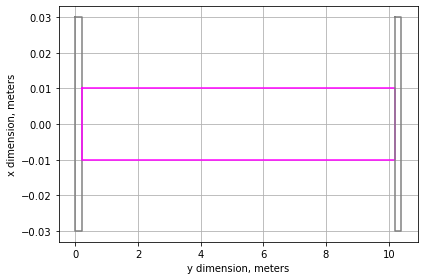

In [1]:
from particle_tracer_lattice import ParticleTracerLattice
from particle_tracer import ParticleTracer
from particle import Particle
L_drift=.2
L_lens=10.0
Bp=1.0
rp=.01
lattice=ParticleTracerLattice(initial_ang=0.0) #make the lattice and point it along +x
#add some elements
lattice.add_drift(L_drift)
lattice.add_lens_ideal(L_lens,Bp,rp)
lattice.add_drift(L_drift)
lattice.end_lattice() #finish the lattice so the geometry can be solved
pt=ParticleTracer(lattice)
lattice.show(true_aspect_ratio=False)

In order to apply numba, we must enable fast_mode. This will also no longer log phase space coordinates or particles energy. Let's compare the run time of tracing a particle with fine step between both approaches. We'll use what's known as "notebook magic", ie a notebook command

In [2]:
h=1e-6
T=10.0
def trace_particle(fast_mode):
    particle=Particle(qi=(0,1e-3,1e-3),pi=(210.,0,0))
    particle=pt.trace(particle,h,T,fast_mode=fast_mode)

In [5]:
%timeit trace_particle(True) #notebook magic

735 µs ± 83.9 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [4]:
%timeit trace_particle(False) #notebook magic

786 ms ± 37.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


On my machine the difference between the two results was 3 orders of magnitude (624 us vs 683 ms). When using numba it is normal to expect the first use to take longer because of compilation and you may need to run the cells twice. Using fast_mode allows significant performance gains.